# Metrics exercise 1: Churning

In this exercise we will analyze data from a cellular service provider. The company has thousands of customers and would like to predict which are likely to [churn](https://en.wikipedia.org/wiki/Customer_attrition) (to stop using the service) in the next three months.

We will use the given dataset of 50k prior customers and whether they churned:

In [1]:
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import sklearn.metrics
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('features_churn_matrix_ex1.csv')
df.head()

,is_male,num_interactions_with_cust_service,country,late_on_payment,age,years_in_contract,churned
0,True,0.0,GRE,False,41.0,3.240370,False
1,True,1.0,ISR,False,29.0,2.121320,False
2,False,0.0,GRE,False,34.0,3.240370,False
3,False,1.0,ISR,False,29.0,3.240370,False
4,True,0.0,ISR,False,33.0,3.082207,False


## Part 1: Analysis

### Questions
**1.** Split the dataset into train and test datasets `X_train, X_test, y_train, y_test` using `sklearn.model_selection.train_test_split` with 20% test data. Note: make sure that `X_train` and `X_test` only contain numeric and boolean values.


In [3]:
# your code here
X = df.iloc[:,:-1]
y = df.churned
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)


In [4]:
encoder = OneHotEncoder(sparse = False, handle_unknown = 'ignore')
encoder.fit(X_train[['country']])

train_encoder_df = pd.DataFrame(encoder.transform(X_train[['country']]), columns = encoder.get_feature_names_out(['country']), index = X_train.index)
X_train = pd.concat([X_train,train_encoder_df], axis = 1).drop(columns = ['country'])

test_encoder_df = pd.DataFrame(encoder.transform(X_test[['country']]), columns = encoder.get_feature_names_out(['country']), index = X_test.index)
X_test = pd.concat([X_test,test_encoder_df], axis = 1).drop(columns = ['country'])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [5]:
X_train.head()

,is_male,num_interactions_with_cust_service,late_on_payment,age,years_in_contract,country_GRE,country_ISR
39087,True,1.0,False,28.0,3.674235,1.0,0.0
30893,False,4.0,False,24.0,0.707107,0.0,1.0
45278,True,0.0,False,30.0,3.535534,1.0,0.0
16398,True,0.0,False,33.0,3.535534,1.0,0.0
13653,False,1.0,False,23.0,0.707107,1.0,0.0


In [6]:
for columns in X_train.columns:
  assert pd.to_numeric(X_train[columns]).notna().all() or X_train[columns].dtype == 'bool'
  assert pd.to_numeric(X_test[columns]).notna().all() or X_test[columns].dtype == 'bool'

**2.** Train a Random Forest classifier `clf` (using `sklearn.ensemble.RandomForestClassifier`) to predict whether a customer will churn. Save the predictions on the test data in an array `y_pred`.


In [7]:
# your code here
clf = RandomForestClassifier()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)


**3.** Print the confusion matrix and a classification report (`sklearn.metrics.classification_report`) for your model.


In [8]:
# your code here
confusion_matrix(y_test,y_pred)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       False       0.89      0.94      0.91      8423
        True       0.51      0.35      0.42      1577

    accuracy                           0.85     10000
   macro avg       0.70      0.65      0.66     10000
weighted avg       0.83      0.85      0.83     10000



**4.** What is the accuracy of the model on the test data? How well does it predict churn?


The accuracy of the model on the test data is 0.85
Moreover, we have a great macro average precision and recall, same for the weighted average. So the model predict churn well.

**5.** Use `clf.predict_proba` to get the probabilities of churning predicted for the test data and save to an array `y_probs`. Note: `y_probs` should be of shape `(10000,)` (check with `y_probs.shape`)

In [9]:
# your code here
y_probs = clf.predict_proba(X_test)[:,1]




**6.** In `y_pred` we predicted churning if the probability of churning in `y_probs` is $\geq 0.5$. Instead we could use a different threshold $p$, predicting churning if the probability  of churning in `y_probs` is $\geq p$. Print a classification report and confusion matrix for the model using threshold $p = 0.2$. How do the predictions of this model compare to the model in question 4?


In [10]:
# your code here
new_y_pred = (y_probs >=0.2)
confusion_matrix(y_test,new_y_pred)
print(classification_report(y_test,new_y_pred))

              precision    recall  f1-score   support

       False       0.92      0.80      0.86      8423
        True       0.37      0.63      0.47      1577

    accuracy                           0.78     10000
   macro avg       0.65      0.72      0.66     10000
weighted avg       0.83      0.78      0.80     10000



The accuracy is lower here (0.78) than for p = 0.5.
Moreover, we have a lower macro avg for precision, same for the weighted average of recall.
So this model will predict less accurately than the previous one.

**7.** Plot the ROC and precision-recall curves for the model. What is the ROC AUC score? Hint: use `sklearn.metrics.roc_curve/precision_recall_curve/roc_auc_score`.


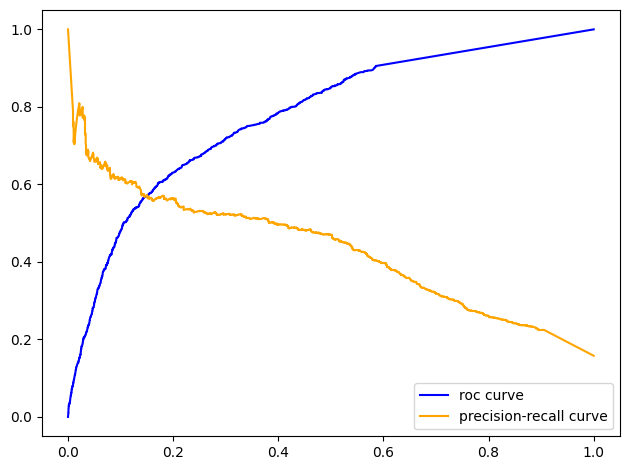

0.7789960996218419

In [11]:
# your code here
fpr,tpr,thresholds= sklearn.metrics.roc_curve(y_test,y_probs)
plt.plot(fpr,tpr, label = 'roc curve', color = 'blue')
precision,recall,thresholds = sklearn.metrics.precision_recall_curve(y_test,y_probs)
plt.plot(recall,precision, label = 'precision-recall curve', color = 'orange')

plt.legend()
plt.tight_layout()
plt.show()

auc_score = sklearn.metrics.roc_auc_score(y_test,y_probs)
auc_score

The ROC AUC score is 0.78

**8.** What is the precision at 0.7 recall level? What value of threshold probability $p$ does this correspond to?

In [12]:
# your code here
recall_level = 0.7
indexes = np.array(np.where(recall > 0.7))
recall_index = indexes.argmax()
precision_level = precision[recall_index]

precision_level



0.3188908145580589

In [13]:
thresholds[recall_index]

0.13800191475191473

The precision at 0.7 recall level is 0.32
It corresponds to a threshold of 0.14

## Part 2: Getting Down to Business

Now let's consider some business use cases.

**Business case A**: We want to predict customers who might churn soon, to focus attention on. We will target them with an email campaign to encourage them to keep using our service.

**Business case B**: We will instead target customers who are likely to churn with customer support attention and heavily discounted products. Each customer targeted will require a significant investment of time and money.

**Questions**:
**9.** What threshold value $p$ would you use for business case A? Why?


As an email campaign is not that expensive, i would use a low threshold in order to prevent as many customers as posible so probably around 0.2

**10.** What threshold value $p$ would you use for business case B? Why?

As each customer targeted will now require a significant investment, we will prefer to take a higher threshold, probably around 0.7